In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!ls '/content/drive/My Drive/notebooks/GANs'

04_01_gan_camel_train.ipynb  my_gan		 my_gan_v2.ipynb  utils
models			     my_gan_mnist.ipynb  run


In [3]:
import sys
import numpy as np
sys.path.append('/content/drive/My Drive/notebooks/GANs')
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from keras.datasets import mnist
from my_gan.GAN import GAN


Using TensorFlow backend.


In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)

train_images = train_images.astype('float32') / 255
train_images = train_images*2-1

print(np.min(train_images), np.max(train_images))
train_images = train_images.reshape((train_images.shape[0], train_images.shape[1], train_images.shape[2], 1))


11493376/11490434 [==============================] - 2s 0us/step
(60000, 28, 28)
-1.0 1.0


In [5]:
print(train_images.shape)

(60000, 28, 28, 1)


(18, 28, 28, 1)


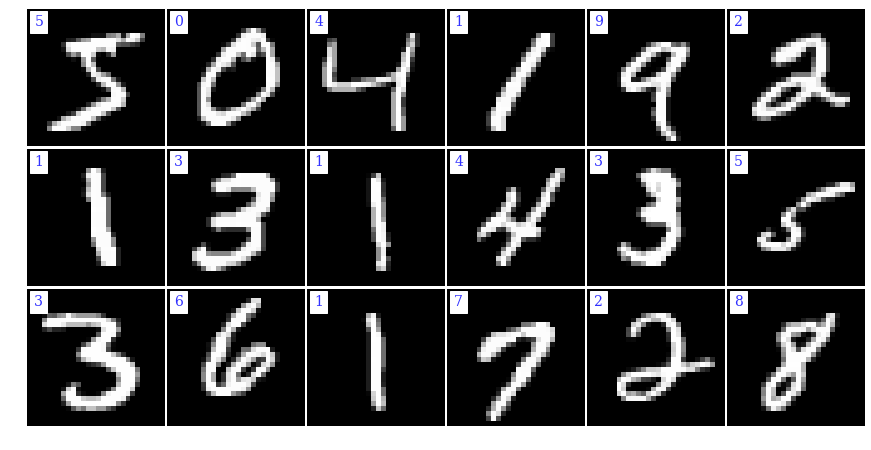

In [6]:
images_mnist = train_images[:18,:,:]
print(images_mnist.shape)
fig = plt.figure(figsize=(15,15))
#from https://matplotlib.org/2.0.2/mpl_toolkits/axes_grid/users/overview.html
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(3, 6),  # creates 2x2 grid of axes
                 axes_pad=0.04,  # pad between axes in inch.
                 )
font = {'family': 'serif',
        'size': 14,
        }
for i in range(18):
    ax = grid[i]

    img = images_mnist[i].reshape((train_images.shape[1], train_images.shape[2]))
    ax.text(1, 3, '%d' % train_labels[i],  fontdict=font, color='b', backgroundcolor='w', alpha=0.8)
    ax.imshow((img+1)/2, cmap='gray')
    ax.axis('off')
plt.show()

In [7]:
gan = GAN(input_dim = (28,28,1))

W0721 19:49:53.063440 140613215901568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0721 19:49:53.100758 140613215901568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0721 19:49:53.102240 140613215901568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0721 19:49:53.130263 140613215901568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0721 19:49:53.140290 14

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        1664      
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          102464    
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         204928    
_________________________________________________________________
dropout_3 (Dropout)          (None, 4, 4, 128)         0         
__________

W0721 19:49:56.164601 140613215901568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3136)              316736    
_________________________________________________________________
batch_normalization_1 (Batch (None, 3136)              12544     
_________________________________________________________________
activation_1 (Activation)    (None, 3136)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 64)        0         
__________

In [0]:
batch_size = 64
epochs = 3000
print_every_n_batches = 100
folder = '/content/drive/My Drive/notebooks/GANs/my_gan'

In [9]:
gan.train(     
    train_images
    , batch_size = batch_size
    , epochs = epochs
    , run_folder = folder
    , print_every_n_batches = print_every_n_batches
)

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: (0.742)(R 0.694, F 0.789)] [D acc: (0.234)(0.469, 0.000)] [G loss: 0.682] [G acc: 1.000]


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1 [D loss: (0.740)(R 0.674, F 0.807)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.690] [G acc: 1.000]
2 [D loss: (0.694)(R 0.687, F 0.701)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.690] [G acc: 1.000]
3 [D loss: (0.692)(R 0.685, F 0.699)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.682] [G acc: 0.922]
4 [D loss: (0.687)(R 0.672, F 0.701)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.558] [G acc: 0.984]
5 [D loss: (2.083)(R 0.603, F 3.563)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.640] [G acc: 0.859]
6 [D loss: (0.707)(R 0.634, F 0.780)] [D acc: (0.539)(1.000, 0.078)] [G loss: 0.673] [G acc: 0.594]
7 [D loss: (0.598)(R 0.630, F 0.567)] [D acc: (0.977)(0.953, 1.000)] [G loss: 0.675] [G acc: 0.578]
8 [D loss: (0.459)(R 0.595, F 0.324)] [D acc: (0.953)(0.906, 1.000)] [G loss: 0.476] [G acc: 0.875]
9 [D loss: (1.406)(R 0.530, F 2.283)] [D acc: (0.469)(0.938, 0.000)] [G loss: 0.915] [G acc: 0.000]
10 [D loss: (0.751)(R 0.825, F 0.676)] [D acc: (0.312)(0.000, 0.625)] [G loss: 0.722] [G acc: 0.281]

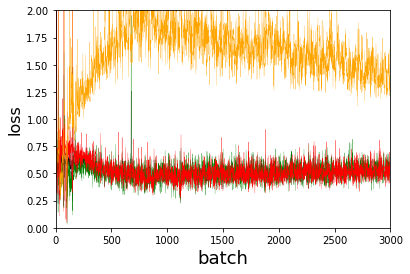

In [10]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot([x[0] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.xlim(0, 3000)
plt.ylim(0, 2)

plt.show()
#green discriminator real
#red discriminator fake

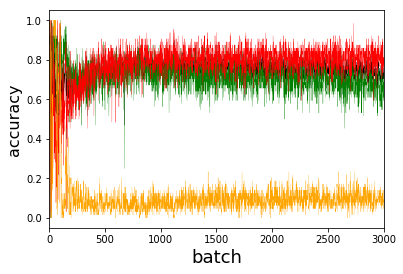

In [11]:
fig = plt.figure()
plt.plot([x[3] for x in gan.d_losses], color='black', linewidth=0.25)
plt.plot([x[4] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[5] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot([x[1] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('accuracy', fontsize=16)

plt.xlim(0, 3000)

plt.show()

In [12]:
noise = np.random.normal(0, 1, (18, 100))
gen_imgs = gan.generator.predict(noise)
print(gen_imgs.shape)

(18, 28, 28, 1)


(18, 28, 28, 1)


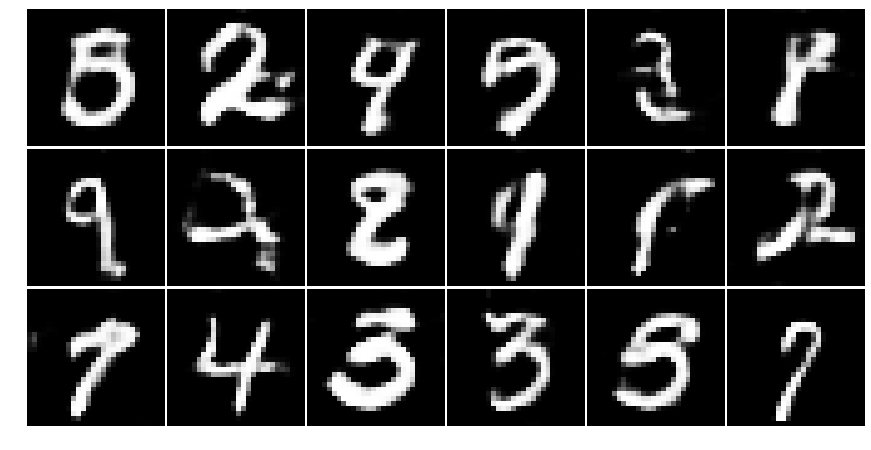

In [69]:
images_mnist = gen_imgs[:18,:,:]
print(images_mnist.shape)
fig = plt.figure(figsize=(15,15))
#from https://matplotlib.org/2.0.2/mpl_toolkits/axes_grid/users/overview.html
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(3, 6),  # creates 2x2 grid of axes
                 axes_pad=0.04,  # pad between axes in inch.
                 )
font = {'family': 'serif',
        'size': 14,
        }
for i in range(18):
    ax = grid[i]

    img = images_mnist[i].reshape((train_images.shape[1], train_images.shape[2]))
    ax.imshow((img+1)/2, cmap='gray')
    ax.axis('off')
plt.show()

### Interpolation in the latent space

In [167]:
#linear interpolation
lamb = np.arange(0,1.1,0.2)
print(lamb)
p0 = noise[3,:]
p1 = noise[13,:]

p = []
for l in lamb:
  tmp = (1-l) * p0 + l*p1
  p.append(tmp)
# px = (1-lamb)*p0[0] + lamb*p1[0]
# py = (1-lamb)*p0[1] + lamb*p1[1]
p = np.asarray(p)
print(p.shape)

[0.  0.2 0.4 0.6 0.8 1. ]
(6, 100)


In [174]:
#pca
print(noise.shape)
pca = PCA(n_components=2)
data_reduced = pca.fit(noise)
data_reduced = np.dot(noise - pca.mean_, pca.components_.T)
print(data_reduced.shape)

(18, 100)
(18, 2)


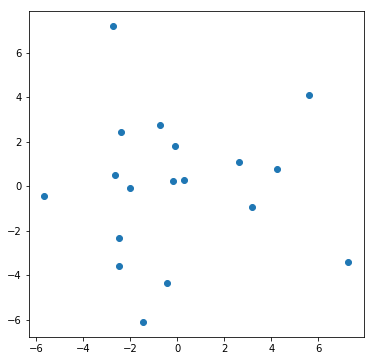

In [175]:
plt.figure(figsize=(6, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1])
plt.show()

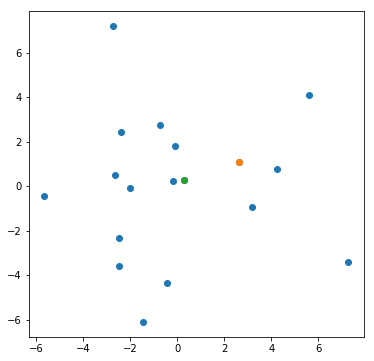

In [176]:
plt.figure(figsize=(6, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1])
plt.scatter(data_reduced[3, 0], data_reduced[3, 1])#orange
plt.scatter(data_reduced[13, 0], data_reduced[13, 1])#green
plt.show()

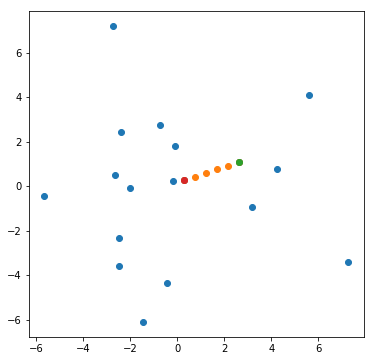

In [177]:
data_reduced_interp = np.dot(p - pca.mean_, pca.components_.T)
plt.figure(figsize=(6, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1])
plt.scatter(data_reduced_interp[:,0], data_reduced_interp[:,1])
plt.scatter(data_reduced[3, 0], data_reduced[3, 1])#orange
plt.scatter(data_reduced[13, 0], data_reduced[13, 1])#green
plt.show()

In [178]:
#linear interpolation
lamb = np.arange(0,1.1,0.2)
print(lamb)
p0 = np.asarray([data_reduced[3, 0], data_reduced[3, 1]])
p1 = np.asarray([data_reduced[13, 0], data_reduced[13, 1]])

px = (1-lamb)*p0[0] + lamb*p1[0]
py = (1-lamb)*p0[1] + lamb*p1[1]


[0.  0.2 0.4 0.6 0.8 1. ]


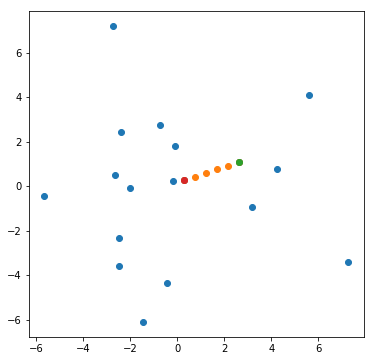

In [179]:
plt.figure(figsize=(6, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1])
plt.scatter(px, py)
plt.scatter(data_reduced[3, 0], data_reduced[3, 1])#orange
plt.scatter(data_reduced[13, 0], data_reduced[13, 1])#green
plt.show()

In [180]:
print(images_mnist.shape)
print(noise[3].shape)
img0 = noise[3].reshape(1,100)
img1 = noise[13].reshape(1,100)
imgs = np.asarray([img0, img1])
imgs = imgs.reshape(2,100)

print(imgs.shape)
#t  = np.random.normal(0, 1, (1, 100))
#print(t.shape)
gen_ = gan.generator.predict(imgs)

(2, 28, 28, 1)
(100,)
(2, 100)


(2, 28, 28, 1)


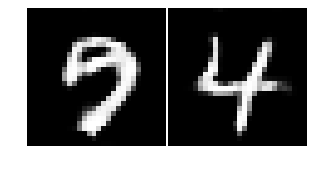

In [181]:
images_mnist = gen_[:,:,:]
print(images_mnist.shape)
fig = plt.figure(figsize=(5,5))
#from https://matplotlib.org/2.0.2/mpl_toolkits/axes_grid/users/overview.html
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(1, 2),  # creates 2x2 grid of axes
                 axes_pad=0.04,  # pad between axes in inch.
                 )

for i in range(2):
    ax = grid[i]

    img = images_mnist[i].reshape((train_images.shape[1], train_images.shape[2]))
    ax.imshow((img+1)/2, cmap='gray')
    ax.axis('off')
plt.show()

In [194]:

data_interp = p[:]
print(data_interp.shape)
#data_original = np.dot(data_reduced, pca.components_) + pca.mean_

#img0 = data_interp.reshape(1,100)
#img1 = data_interp[13].reshape(1,100)
#imgs = np.asarray([img0, img1])
#imgs = imgs.reshape(2,100)

gen_ = gan.generator.predict(data_interp)
print(gen_.shape)

(6, 100)
(6, 28, 28, 1)


(6, 28, 28, 1)


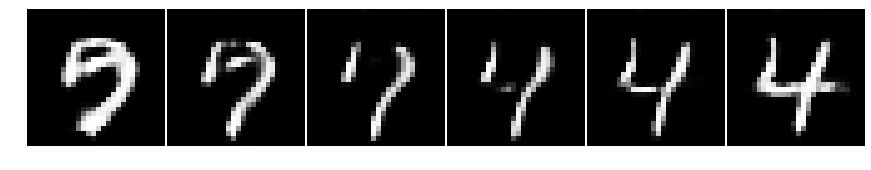

In [198]:
images_mnist = gen_[:,:,:]
print(images_mnist.shape)
fig = plt.figure(figsize=(15,15))
#from https://matplotlib.org/2.0.2/mpl_toolkits/axes_grid/users/overview.html
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(1, 6),  # creates 2x2 grid of axes
                 axes_pad=0.04,  # pad between axes in inch.
                 )

for i in range(6):
    ax = grid[i]

    img = images_mnist[i].reshape((train_images.shape[1], train_images.shape[2]))
    ax.imshow((img+1)/2, cmap='gray')
    ax.axis('off')
plt.show()

### Sum in the latent space

(3, 28, 28, 1)
(3, 28, 28, 1)


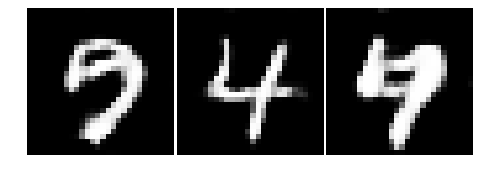

In [219]:
p0 = noise[3,:].reshape(1,100)
p1 = noise[13,:].reshape(1,100)

p_add = p0+p1

imgs = np.asarray([p0,p1,p_add]).reshape(3,100)
gen_ = gan.generator.predict(imgs)
print(gen_.shape)

images_mnist = gen_[:,:,:]
print(images_mnist.shape)
fig = plt.figure(figsize=(8,8))
#from https://matplotlib.org/2.0.2/mpl_toolkits/axes_grid/users/overview.html
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(1, 3),  # creates 2x2 grid of axes
                 axes_pad=0.04,  # pad between axes in inch.
                 )

for i in range(3):
    ax = grid[i]

    img = images_mnist[i].reshape((train_images.shape[1], train_images.shape[2]))
    ax.imshow((img+1)/2, cmap='gray')
    ax.axis('off')
plt.show()

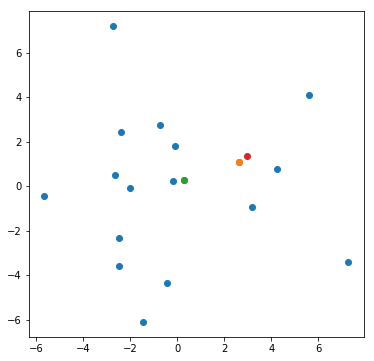

In [220]:
d_red = np.dot(p_add - pca.mean_, pca.components_.T)

plt.figure(figsize=(6, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1])
plt.scatter(data_reduced[3, 0], data_reduced[3, 1])#orange
plt.scatter(data_reduced[13, 0], data_reduced[13, 1])#green
plt.scatter(d_red[0, 0], d_red[0, 1])#green
plt.show()

(3, 28, 28, 1)
(3, 28, 28, 1)


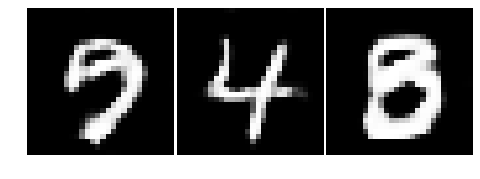

In [216]:
p0 = noise[3,:].reshape(1,100)
p1 = noise[13,:].reshape(1,100)

p_sub = p0-p1

imgs = np.asarray([p0,p1,p_sub]).reshape(3,100)
gen_ = gan.generator.predict(imgs)
print(gen_.shape)

images_mnist = gen_[:,:,:]
print(images_mnist.shape)
fig = plt.figure(figsize=(8,8))
#from https://matplotlib.org/2.0.2/mpl_toolkits/axes_grid/users/overview.html
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(1, 3),  # creates 2x2 grid of axes
                 axes_pad=0.04,  # pad between axes in inch.
                 )

for i in range(3):
    ax = grid[i]

    img = images_mnist[i].reshape((train_images.shape[1], train_images.shape[2]))
    ax.imshow((img+1)/2, cmap='gray')
    ax.axis('off')
plt.show()

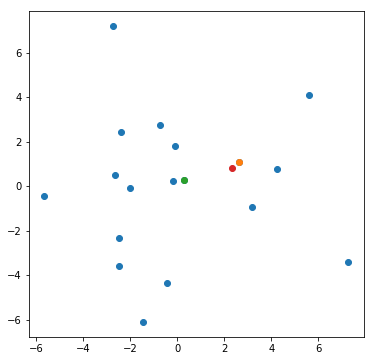

In [218]:
d_red = np.dot(p_sub - pca.mean_, pca.components_.T)

plt.figure(figsize=(6, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1])
plt.scatter(data_reduced[3, 0], data_reduced[3, 1])#orange
plt.scatter(data_reduced[13, 0], data_reduced[13, 1])#green
plt.scatter(d_red[0, 0], d_red[0, 1])#green
plt.show()